In [20]:

# Importation des librairies
import pandas as pd                                                         # Pour la manipulation des données
import numpy as np                                                          # Pour les calculs
import seaborn as sns                                                       # Pour les graphiques
import matplotlib.pyplot as plt                                      
from sklearn.model_selection import train_test_split                        # Pour séparer le jeu de données en jeu d'entraînement et jeu de test
from sklearn.ensemble import RandomForestClassifier                         # Pour le modèle de classification
from sklearn.preprocessing import StandardScaler                            # Pour la standardisation des données
from sklearn.model_selection import GridSearchCV, cross_validate            # Pour la validation croisée
from sklearn.model_selection import cross_val_score, StratifiedKFold        # Pour la validation croisée
from sklearn.model_selection import RandomizedSearchCV, RandomizedSearchCV  # Pour la validation croisée
from sklearn.metrics import make_scorer, roc_auc_score, roc_curve           # Pour le scoring
from sklearn.metrics import classification_report, confusion_matrix         
from sklearn.metrics import precision_score, recall_score, f1_score         
from sklearn.metrics import make_scorer, matthews_corrcoef
from sklearn.metrics import recall_score,fbeta_score                        # Pour le score Fbeta                   
from tqdm.notebook import tqdm                                              # Pour la barre de chargement
from time import time                                                       # Pour calculer le temps d'exécution
from itertools import product                                               # Pour faire des boucles sur plusieurs paramètres   
from imblearn.under_sampling import RandomUnderSampler                      # Pour le sous-échantillonnage
from imblearn.over_sampling import RandomOverSampler                        # Pour le sur-échantillonnage
import pickle                                                               # Pour sauvegarder le modèle
from sklearn.model_selection import cross_val_predict                       # Pour la validation croisée
import ast                                                                  # Pour convertir une chaîne de caractères en liste
from sklearn.metrics import precision_recall_curve, auc                     # Pour la courbe de précision-rappel


pd.options.display.max_columns = 60
pd.options.display.max_rows = 150
pd.set_option('display.max_colwidth', None)


1. [**Import Dataset verification de la repartition des classes**](#1.-Import-Dataset-verification-de-la-repartition-des-classes)
2. [**Separation du dataset en test/train**](#2.-Separation-du-dataset-en-test/train)
3. [**Fonctions generales**](#3.-Fonctions-generales)
4. [**Test de différentes méthodes d'échantillonnage**](#4.-Test-de-differentes-methodes-dechantillonnage)
    1.  [Fonctions](#4.1-Fonctions)
    2.  [Sauvegarde/Import des resultats](#4.2-Sauvegarde/Import-des-resultats)
    3.  [Resultats](#4.3-Resultats)
5. [**Recherche d'Hyperparametres avec RandomGridSearchCV**](#5.-Recherche-d'Hyperparametres-avec-RandomGridSearchCV) 
    1.  [Sauvegarde/recharge des resultats du gridsearchCV](#5.1-Sauvegarde/recharge-des-resultats-du-model)
    2.  [Affichage et analyse de resultats](#5.2-Affichage-de-resultats)
6. [**Resultats du model sur le donnees de test**](#6.-Resultats-du-model-sur-le-donnees-de-test)
    1.  [Entraînement du modèle](#6.1-Entrainement-du-modele)  
    2.  [Sauvegarde/Recharge du modele](#6.2-Sauvegarde/Recharge-du-modele)   
    3.  [Prédiction sur le dataset de test](#6.3-Prediction-sur-le-dataset-de-train/test)
7. [**Feature Importance with Random Forests**](#7.-Feature-Importance-with-Random-Forests)
8. [**Optimisation des resultat de prediction**](#8.-Optimisation-des-resultat-de-prediction)
    1.  [ROC/AUC](#8.1-ROC/AUC)
    2.  [Courbe Fscore](#8.2-Courbe-Fscore)
        - a. [Affichage des courbes](#8.2.1.-Affichage-des-courbes)
        - b. [Optimisation du score](#8.2.2.-Optimisation-du-score)


### **1. Import Dataset verification de la repartition des classes**

In [21]:
# Import dataset
df = pd.read_csv('/Users/artmskfr/Desktop/Formations/GitHub/Projects/1_Project_RoadAccident/data/dataset_18-21_for_model_encoding.csv',sep=',', index_col=0)
df.head()

,grav,nb_veh,mois_2,mois_3,mois_4,mois_5,mois_6,mois_7,mois_8,mois_9,mois_10,mois_11,mois_12,lum_2.0,lum_3.0,agg_2,int_2.0,int_3.0,atm_2.0,atm_3.0,atm_4.0,atm_5.0,col_2.0,col_3.0,col_4.0,catr_2,catr_3,catr_4,catr_5,circ_2.0,...,heure_15,heure_16,heure_17,heure_18,heure_19,heure_20,heure_21,heure_22,heure_23,periode_Matin,periode_Nuit,periode_Soir,age_cond_14-17,age_cond_18-24,age_cond_25-34,age_cond_35-44,age_cond_45-54,age_cond_55-64,age_cond_65-74,age_cond_75-94,age_cond_8-13,age_cond_95-plus,sexe_cond_2.0,age_usag_11-17,age_usag_18-24,age_usag_25-64,age_usag_3-6,age_usag_65-74,age_usag_7-10,age_usag_75-plus
Num_Acc,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
201800000001,3.0,0.117620,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,1,...,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1
201800000001,1.0,0.117620,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,1,...,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0
201800000002,1.0,-1.083406,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,1,...,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0
201800000003,3.0,-1.083406,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
201800000004,1.0,-1.083406,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,1,...,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0


> 1 – Indemne , 4 – Blessé léger   - categorie 0  :  Pas gave
> 
> 2 – Tué , 3 – Blessé hospitalisé - categorie 1  :  Grave

In [22]:
# Distribution des classes
df_c = df.copy()
df_c['grav'] = df_c['grav'].replace([1.0, 4.0],0).replace([2.0, 3.0],1)
print(round(df_c['grav'].value_counts(normalize= True)*100,1).map(lambda x: f"{x}%"))

print('\n')

Repartition = pd.crosstab(df_c['grav'], df_c['grav'], normalize='all').round(3)*100
Repartition = Repartition.rename(index={0: 'Pas grave', 1: 'Graves'}, columns={0: 'Pas Grave', 1: 'Graves'}). \
                                                rename_axis('', axis='rows').rename_axis('', axis='columns')

print("\033[1mRepartition de la variable cible par default en [%]\033[0m\n")
print(Repartition)

grav
0.0    81.7%
1.0    18.3%
Name: proportion, dtype: object


Repartition de la variable cible par default en [%]

           Pas Grave  Graves
                            
Pas grave       81.7     0.0
Graves           0.0    18.3


### **2. Separation du dataset en test/train**

In [23]:
X = df_c.drop('grav', axis=1)  
y = df_c['grav']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Verification de la repar

df_train = y_train.value_counts(normalize=True) * 100
print("Répartition des classes dans l'ensemble d'entraînement:")
print(round(df_train, 1))

df_test =y_test.value_counts(normalize=True) * 100
print("\nRépartition des classes dans l'ensemble de test:")
print(round(df_test, 1))

Répartition des classes dans l'ensemble d'entraînement:
grav
0.0    81.7
1.0    18.3
Name: proportion, dtype: float64

Répartition des classes dans l'ensemble de test:
grav
0.0    81.6
1.0    18.4
Name: proportion, dtype: float64


### **3. Fonctions generales**

In [24]:
# Model simple Random Forest binaire
def RF_bin_simple(X_train, X_test, y_train, y_test, param_grid):
    mod_RF_simple = RandomForestClassifier(**param_grid, n_jobs=-1, random_state=42)
    mod_RF_simple.fit(X_train, y_train)
    return mod_RF_simple
# Print les paramètres du modèle
def parameters(model):
    params = model.get_params()
    df_params = pd.DataFrame.from_dict(params, orient='index', columns=['Valeur'])  # Créer un DataFrame à partir du dictionnaire de paramètres
    return print(df_params)
# Print les rapports de classification
def plot_confusion_matrix(y_true, y_pred, title, ax):
    cm = confusion_matrix(y_true, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False, ax=ax)
    ax.set_title(title)
    ax.set_xlabel('Predicted')
    ax.set_ylabel('True')
def print_rapports(y_train, y_train_pred, y_test, y_test_pred):
    fig, axes = plt.subplots(1, 2, figsize=(6, 3))
    
    # Matrice de confusion pour les données d'entraînement
    axes[0].set_title("Matrice de confusion - Données de train")
    plot_confusion_matrix(y_train, y_train_pred, title='Confusion Matrix - Train Data', ax=axes[0])

    # Matrice de confusion pour les données de test
    axes[1].set_title("Matrice de confusion - Données de test")
    plot_confusion_matrix(y_test, y_test_pred, title='Confusion Matrix - Test Data', ax=axes[1])

    plt.tight_layout()
    plt.show()

    # Rapport de classification pour les données d'entraînement
    print("Rapport de classification - Données d'entraînement :")
    print(classification_report(y_train, y_train_pred))
    print("\n"*2)

    # Rapport de classification pour les données de test
    print("Rapport de classification - Données de test :")
    print(classification_report(y_test, y_test_pred))
# Print les courbes ROC  
def plot_roc_curve(model, X_test, y_test):
    ns_probs = [0 for _ in range(len(y_test))]
    y_prob = model.predict_proba(X_test)[:, 1]

    ns_auc = roc_auc_score(y_test, ns_probs)
    RF_roc = roc_auc_score(y_test, y_prob)

    # Calcul de la courbe ROC
    rf_fpr, rf_tpr, rf_thresholds = roc_curve(y_test, y_prob)
    ns_fpr, ns_tpr, ns_thresholds = roc_curve(y_test, ns_probs)

    # Affichage de la courbe ROC
    plt.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
    plt.plot(rf_fpr, rf_tpr, marker='.', label='Random Forest')

    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Courbe ROC')

    # Trouver le point le plus proche du coin supérieur gauche
    closest_idx = np.argmin(np.sqrt((rf_fpr - 0)**2 + (rf_tpr - 1)**2))
    closest_point = (rf_fpr[closest_idx], rf_tpr[closest_idx])
    closest_threshold = rf_thresholds[closest_idx]

    # Récupérer les valeurs de probabilité pour le point le plus proche du coin 
    closest_prob = y_prob[np.argmax(np.logical_and(rf_fpr == closest_point[0], rf_tpr == closest_point[1]))]

    # Appliquer le seuil de probabilité aux prédictions 
    closest_pred = (y_prob >= closest_threshold).astype(int)

    # Calculer les métriques de performance
    closest_precision = precision_score(y_test, closest_pred)
    closest_recall = recall_score(y_test, closest_pred)
    closest_f1 = f1_score(y_test, closest_pred)

    # Tracer la courbe ROC
    plt.scatter(closest_point[0], closest_point[1], color='red', label='Point le plus proche', s=100, marker='o')

    # Afficher les résultats pour le point le plus proche du coin supérieur gauche
    print("Résultats pour le point le plus proche du coin :")
    print('Coordonnées du point le plus proche : ({:.2f}, {:.2f})'.format(closest_point[0], closest_point[1]))
    print("Seuil de probabilité : {:.4f}".format(closest_threshold))
    print("Precision: {:.2f}".format(closest_precision))
    print("Recall: {:.2f}".format(closest_recall))
    print("F1-Score: {:.2f}".format(closest_f1))
    print("AUC-ROC : {:.2f}".format(RF_roc))

    # Afficher le graphique
    plt.legend()
    plt.show() 
# Optimisation le recall
def evaluate_model_with_threshold(model, X_test, y_test, recall_threshold):
    y_prob = model.predict_proba(X_test)[:, 1]

    # Calculer la courbe ROC
    fpr, tpr, thresholds = roc_curve(y_test, y_prob)
    auc_roc = roc_auc_score(y_test, y_prob)

    
    thresholds_dense = np.linspace(0, 1, 100)

    # Rechercher le seuil de probabilité qui maximise le rappel tout en maintenant une précision acceptable
    best_threshold = None
    best_precision = 0.0
    best_recall = 0.0
    for threshold in thresholds_dense:
        y_pred = (y_prob >= threshold).astype(int)
        precision = precision_score(y_test, y_pred)
        recall = recall_score(y_test, y_pred)
        if recall >= recall_threshold:
            if precision > best_precision or (precision == best_precision and recall > best_recall):
                best_threshold = threshold
                best_precision = precision
                best_recall = recall

    # Appliquer le meilleur seuil de probabilité aux prédictions
    y_pred_best = (y_prob >= best_threshold).astype(int)

    # Calculer les métriques de performance avec le meilleur seuil
    precision = precision_score(y_test, y_pred_best)
    recall = recall_score(y_test, y_pred_best)
    f1 = f1_score(y_test, y_pred_best)

    # Afficher les résultats
    print("Résultats pour le point qui maximise le rappel :")
    print("Seuil de probabilité : {:.4f}".format(best_threshold))
    print("Precision: {:.4f}".format(precision))
    print("Recall: {:.4f}".format(recall))
    print("F1-Score: {:.4f}".format(f1))
    print("AUC-ROC : {:.2f}".format(auc_roc)) 

In [25]:
#old version recherhce sur unbalanced dataset
'''
import numpy as np
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score, cross_val_predict, cross_validate
from sklearn.metrics import make_scorer, matthews_corrcoef, f1_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import StratifiedKFold
from imblearn.under_sampling import RandomUnderSampler

def compare_methods_inbalamced_ds(X_train, X_test, y_train, y_test):
# Methode 0 : Utilisation de Random Forest sans équilibrer les classes
    # Cross validation
    rf_cv = RandomForestClassifier(random_state=42)
    cv_scoring = {'MCC': make_scorer(matthews_corrcoef), 'f1': make_scorer(f1_score)}
    cv_0 = cross_validate(rf_cv, X_train, y_train, cv=3, scoring=cv_scoring, return_train_score=True)
    score_0 = cv_0['test_MCC', 'test_f1'].mean()
    
# Méthode 1 : Utilisation balanced_subsample pour équilibrer les classes
    rf_balanced_subsample = RandomForestClassifier(class_weight='balanced_subsample', random_state=42)
    cv_scoring = {'MCC': make_scorer(matthews_corrcoef), 'f1': make_scorer(f1_score)}
    cv_1 = cross_validate(rf_cv, X_train, y_train, cv=3, scoring=cv_scoring, return_train_score=True)
    score_1 = cv_1['test_MCC', 'test_f1'].mean()
    
# Méthode 2 : Utilisation de StratifiedKFold pour la validation croisée stratifiée (à comparer au KFold)
    cv_stratified = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)
    rf_stratified_kfold = RandomForestClassifier(random_state=42)
    #scores_stratified_kfold = cross_val_score(rf_stratified_kfold, X_train, y_train, cv=cv_stratified, scoring=scoring, return_train_score=True)
    y_pred_stratified_kfold = cross_val_predict(rf_stratified_kfold, X_train, y_train, cv=cv_stratified)

# Méthode 3 : Utilisation de l'undersampling pour équilibrer les classes
    rus = RandomUnderSampler(random_state=42)
    X_train_undersampled, y_train_undersampled = rus.fit_resample(X_train, y_train)
    rf_undersampled = RandomForestClassifier(random_state=42)
    #scores_undersampled = cross_val_score(rf_undersampled, X_train_undersampled, y_train_undersampled, cv=3, scoring=scoring, return_train_score=True)
    y_pred_undersampled = cross_val_predict(rf_undersampled, X_train_undersampled, y_train_undersampled, cv=3)
    return y_pred_balanced_subsample, y_pred_stratified_kfold, y_pred_undersampled, y_train_undersampled
    
def print_results_inbalamced_ds(y_pred_balanced_subsample, y_pred_stratified_kfold, y_pred_undersampled, y_train_undersampled, y_train):
    print("Méthode: balanced_subsample")
    report_balanced_subsample = classification_report(y_train, y_pred_balanced_subsample, output_dict=False)
    print("Rapport de classification avec valeurs moyennes pour tous les plis:")
    print(report_balanced_subsample)
    print("\n")

    print("Méthode: StratifiedKFold")
    report_stratified_kfold = classification_report(y_train, y_pred_stratified_kfold, output_dict=False)
    print("Rapport de classification avec valeurs moyennes pour tous les plis:")
    print(report_stratified_kfold)
    print("\n")

    print("Méthode: RandomUnderSampler")
    report_undersampled = classification_report(y_train_undersampled, y_pred_undersampled, output_dict=False)
    print("Rapport de classification avec valeurs moyennes pour tous les plis:")
    print(report_undersampled)
    print("\n")
    
# Appeler la fonction pour obtenir les prédictions
y_pred_balanced_subsample, y_pred_stratified_kfold, y_pred_undersampled, y_train_undersampled = compare_methods_inbalamced_ds(X_train, X_test, y_train, y_test)

# Afficher les résultats
print_results_inbalamced_ds(y_pred_balanced_subsample, y_pred_stratified_kfold, y_pred_undersampled, y_train_undersampled, y_train)
'''

'\nimport numpy as np\nfrom sklearn.metrics import classification_report\nfrom sklearn.model_selection import cross_val_score, cross_val_predict, cross_validate\nfrom sklearn.metrics import make_scorer, matthews_corrcoef, f1_score\nfrom sklearn.ensemble import RandomForestClassifier\nfrom sklearn.model_selection import StratifiedKFold\nfrom imblearn.under_sampling import RandomUnderSampler\n\ndef compare_methods_inbalamced_ds(X_train, X_test, y_train, y_test):\n# Methode 0 : Utilisation de Random Forest sans équilibrer les classes\n    # Cross validation\n    rf_cv = RandomForestClassifier(random_state=42)\n    cv_scoring = {\'MCC\': make_scorer(matthews_corrcoef), \'f1\': make_scorer(f1_score)}\n    cv_0 = cross_validate(rf_cv, X_train, y_train, cv=3, scoring=cv_scoring, return_train_score=True)\n    score_0 = cv_0[\'test_MCC\', \'test_f1\'].mean()\n    \n# Méthode 1 : Utilisation balanced_subsample pour équilibrer les classes\n    rf_balanced_subsample = RandomForestClassifier(class_

### **4. Test de differentes methodes d'echantillonnage**

#### **4.1 Fonctions**

In [26]:
# Function pour tester les methodes de equilibrage de classes
def compare_methods_inbalanced_ds(X_train, X_test, y_train, y_test):
    cv=5  
    param_grid = {
    'max_depth': 10,
                 }
    rf_cv = RandomForestClassifier(random_state=42,n_jobs=-1, **param_grid)
    cv_scoring = {'MCC': make_scorer(matthews_corrcoef), 'f1': make_scorer(f1_score)}
###
    # Méthode 0 : Utilisation de Random Forest sans équilibrer les classes
    cv_0 = cross_validate(rf_cv, X_train, y_train, cv=cv, scoring=cv_scoring, return_train_score=True, n_jobs=-1)
    score_0_mcc = cv_0['test_MCC'].mean()
    score_0_f1 = cv_0['test_f1'].mean()
    # Prédiction sur le jeu de test
    rf_cv.fit(X_train, y_train)
    predictions_0 = rf_cv.predict(X_test)
    f1_score_0_test = f1_score(y_test, predictions_0)
    mcc_score_0_test = matthews_corrcoef(y_test, predictions_0)
    report_0 = classification_report(y_test, predictions_0)
###
    # Méthode 1 : Utilisation balanced_subsample pour équilibrer les classes
    rf_balanced_subsample = RandomForestClassifier(class_weight='balanced_subsample', random_state=42, n_jobs=-1,**param_grid)
    cv_1 = cross_validate(rf_balanced_subsample, X_train, y_train, cv=cv, scoring=cv_scoring, return_train_score=True)
    score_1_mcc = cv_1['test_MCC'].mean()
    score_1_f1 = cv_1['test_f1'].mean()
    # Prédiction sur le jeu de test
    rf_balanced_subsample.fit(X_train, y_train)
    predictions_1 = rf_balanced_subsample.predict(X_test)
    f1_score_1_test = f1_score(y_test, predictions_1)
    mcc_score_1_test = matthews_corrcoef(y_test, predictions_1)
    report_1 = classification_report(y_test, predictions_1)
    
###
    # Méthode 2 : Utilisation de RandomOverSampler pour suréchantillonner les classes minoritaires
    ros = RandomOverSampler(random_state=42)
    X_train_ros, y_train_ros = ros.fit_resample(X_train, y_train)
    cv_2 = cross_validate(rf_cv, X_train_ros, y_train_ros, cv=cv, scoring=cv_scoring, return_train_score=True, n_jobs=-1)
    score_2_mcc = cv_2['test_MCC'].mean()
    score_2_f1 = cv_2['test_f1'].mean()
    # Prédiction sur le jeu de test
    rf_cv.fit(X_train_ros, y_train_ros)
    predictions_2 = rf_cv.predict(X_test)
    f1_score_2_test = f1_score(y_test, predictions_2)
    mcc_score_2_test = matthews_corrcoef(y_test, predictions_2)
    report_2 = classification_report(y_test, predictions_2)
    
###
    # Méthode 3 : Utilisation de RandomUnderSampler pour sous-échantillonner les classes majoritaires
    rus = RandomUnderSampler(random_state=42)
    X_train_rus, y_train_rus = rus.fit_resample(X_train, y_train)
    cv_3 = cross_validate(rf_cv, X_train_rus, y_train_rus, cv=cv, scoring=cv_scoring, return_train_score=True, n_jobs=-1)
    score_3_mcc = cv_3['test_MCC'].mean()
    score_3_f1 = cv_3['test_f1'].mean()
    # Prédiction sur le jeu de test
    rf_cv.fit(X_train_rus, y_train_rus)
    predictions_3 = rf_cv.predict(X_test)
    f1_score_3_test = f1_score(y_test, predictions_3)
    mcc_score_3_test = matthews_corrcoef(y_test, predictions_3)
    report_3 = classification_report(y_test, predictions_3)
###
    # Méthode 4 : Utilisation de Random Forest avec StratifiedKFold sans équilibrer les classes
    skf = StratifiedKFold(n_splits=cv, shuffle=True, random_state=42)
    cv_4 = cross_validate(rf_cv, X_train, y_train, cv=skf, scoring=cv_scoring, return_train_score=True, n_jobs=-1)
    score_4_mcc = cv_4['test_MCC'].mean()
    score_4_f1 = cv_4['test_f1'].mean()
###   
    # Méthode 5 : Utilisation balanced_subsample pour équilibrer les classes
    rf_balanced = RandomForestClassifier(class_weight='balanced', random_state=42, n_jobs=-1,**param_grid)
    cv_5 = cross_validate(rf_balanced, X_train, y_train, cv=cv, scoring=cv_scoring, return_train_score=True)
    score_5_mcc = cv_5['test_MCC'].mean()
    score_5_f1 = cv_5['test_f1'].mean()
    # Prédiction sur le jeu de test
    rf_balanced.fit(X_train, y_train)
    predictions_5 = rf_balanced.predict(X_test)
    f1_score_5_test = f1_score(y_test, predictions_5)
    mcc_score_5_test = matthews_corrcoef(y_test, predictions_5)
    report_5 = classification_report(y_test, predictions_5)    
    
 # Creation de dataframe avec les results    
 
    results_list = [
        {'Method': 'Méthode 0', 'Nom': 'Sans équilibrage', 'MCC Train Score': score_0_mcc, 'MCC Test Score': mcc_score_0_test,
        'F1 Train Score': score_0_f1, 'F1 Test Score': f1_score_0_test},
        {'Method': 'Méthode 1', 'Nom': 'Balanced Subsample', 'MCC Train Score': score_1_mcc, 'MCC Test Score': mcc_score_1_test,
        'F1 Train Score': score_1_f1, 'F1 Test Score': f1_score_1_test},
        {'Method': 'Méthode 2', 'Nom': 'Random OverSampling', 'MCC Train Score': score_2_mcc, 'MCC Test Score': mcc_score_2_test,
        'F1 Train Score': score_2_f1, 'F1 Test Score': f1_score_2_test},
        {'Method': 'Méthode 3', 'Nom': 'Random UnderSampling', 'MCC Train Score': score_3_mcc, 'MCC Test Score': mcc_score_3_test,
        'F1 Train Score': score_3_f1, 'F1 Test Score': f1_score_3_test},
        {'Method': 'Méthode 4', 'Nom': 'Stratified K-Fold', 'MCC Train Score': score_4_mcc, 'MCC Test Score': None,
        'F1 Train Score': score_4_f1, 'F1 Test Score': None},  # Méthode 4 n'utilise pas de test
        {'Method': 'Méthode 5', 'Nom': 'Balanced', 'MCC Train Score': score_5_mcc, 'MCC Test Score': mcc_score_5_test,
        'F1 Train Score': score_5_f1, 'F1 Test Score': f1_score_5_test}
                ]


    results_methods_inbalanced = pd.DataFrame(results_list)

    return (results_methods_inbalanced,
            report_0, report_1, report_2, report_3, report_5)

In [27]:
#Exucutions des fonctions (~20 min)

(results_methods_inbalanced,report_0, report_1, report_2, report_3, report_5) = compare_methods_inbalanced_ds(X_train, X_test, y_train, y_test)

#### **4.2 Sauvegarde/Import des resultats**

In [7]:
# Sauvegarder les objets
'''
with open('Save_RandomForest/bin/binaire_comp_inbalanced_cv5_p15.pkl', 'wb') as f:
    pickle.dump((results_methods_inbalanced, report_0, report_1, report_2, report_3, report_5), f)
'''

# Importer les objets
#'''
with open('Save_RandomForest/bin/binaire_comp_inbalanced_cv5_p15.pkl', 'rb') as f:
    loaded_results, loaded_report_0, loaded_report_1, loaded_report_2, loaded_report_3, loaded_report_5 = pickle.load(f)
#'''

#### **4.3 Resultats**

In [6]:
#results_methods_inbalanced
loaded_results

,Method,Nom,MCC Train Score,MCC Test Score,F1 Train Score,F1 Test Score
0,Méthode 0,Sans équilibrage,0.294818,0.295240,0.266626,0.270959
1,Méthode 1,Balanced Subsample,0.429528,0.433874,0.537248,0.540861
2,Méthode 2,Random OverSampling,0.541960,0.429016,0.777398,0.536319
3,Méthode 3,Random UnderSampling,0.531346,0.430545,0.773128,0.537356
4,Méthode 4,Stratified K-Fold,0.293863,NaN,0.266666,NaN
5,Méthode 5,Balanced,0.428728,0.435856,0.536835,0.541854


In [249]:
OLD
'''
param_grid_all = {
    'n_estimators': [100, 300, 500],                    # Nombre d'arbres dans la forêt
    'criterion': ['gini', 'entropy'],                   # Fonction de mesure de qualité de la partition
    'max_depth': [None, 5, 10, 20],                     # Profondeur maximale des arbres
    'min_samples_split': [2, 5, 10],                    # Nombre minimum d'échantillons requis pour diviser un nœud interne
    'min_samples_leaf': [1, 2, 4],                      # Nombre minimum d'échantillons requis pour être une feuille
    'max_features': ['auto', 'sqrt', 'log2', None],     # Nombre de fonctionnalités à considérer lors de la recherche de la meilleure partition
    'bootstrap': [True, False],                         # Si les échantillons doivent être tirés avec remplacement
    'class_weight': [None, 'balanced', 'balanced_subsample'],  # Poids des classes pour l'équilibrage
    'max_samples': [None, 0.5, 0.8],                    # Nombre d'échantillons à tirer lors de l'apprentissage pour chaque arbre
    'max_leaf_nodes': [None, 5, 10, 20],                # Nombre maximum de feuilles
    'ccp_alpha': [0.0, 0.1, 0.2],                       # Paramètre de complexité de l'élagage minimal
    'random_state': [42],                               # Graine aléatoire pour la reproductibilité
    'n_jobs': [-1],                                     # Nombre de tâches à exécuter en parallèle (-1 signifie utiliser tous les cœurs disponibles)
    'oob_score': [True, False]                          # Utiliser les échantillons out-of-bag pour estimer l'erreur de généralisation
}

param_grid = {
    'max_depth': 10,
    'class_weight': None
            }
mod_RF_simple = RF_bin_simple(X_train, X_test, y_train, y_test, param_grid)

# Prédiction sur les données d'entraînement
y_train_pred = mod_RF_simple.predict(X_train)

# Prédiction sur les données de test
y_test_pred = mod_RF_simple.predict(X_test)
'''

"\nparam_grid_all = {\n    'n_estimators': [100, 300, 500],                    # Nombre d'arbres dans la forêt\n    'criterion': ['gini', 'entropy'],                   # Fonction de mesure de qualité de la partition\n    'max_depth': [None, 5, 10, 20],                     # Profondeur maximale des arbres\n    'min_samples_split': [2, 5, 10],                    # Nombre minimum d'échantillons requis pour diviser un nœud interne\n    'min_samples_leaf': [1, 2, 4],                      # Nombre minimum d'échantillons requis pour être une feuille\n    'max_features': ['auto', 'sqrt', 'log2', None],     # Nombre de fonctionnalités à considérer lors de la recherche de la meilleure partition\n    'bootstrap': [True, False],                         # Si les échantillons doivent être tirés avec remplacement\n    'class_weight': [None, 'balanced', 'balanced_subsample'],  # Poids des classes pour l'équilibrage\n    'max_samples': [None, 0.5, 0.8],                    # Nombre d'échantillons à tire

In [250]:
#evaluate_model_with_threshold(mod_RF_simple, X_test, y_test, recall_threshold=0.8)
#plot_roc_curve(mod_RF_simple, X_test, y_test)
#print_rapports(y_train, y_train_pred, y_test, y_test_pred)

### **5. Recherche d'Hyperparametres avec RandomGridSearchCV**

In [28]:
param_dist = {
    'n_estimators': [100, 300, 600, 1000, 1500, 2000, 3000],
    'max_depth': [3, 5, 10],
    'min_samples_split':  [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'class_weight': ['balanced_subsample'],
    'bootstrap': [True],
    'max_features': ['sqrt', 'log2'],
    'criterion': ['gini', 'entropy'],
    'ccp_alpha': [0.0, 0.01]                      
}     

n_iterations = 3  # Nombre d'itérations
param_combinations_per_iteration = len(param_dist['n_estimators']) * len(param_dist['max_depth']) * len(param_dist['min_samples_split']) * len(param_dist['min_samples_leaf']) * len(param_dist['class_weight'])
total_combinations = n_iterations * param_combinations_per_iteration

print(f"Nombre total de combinaisons testées : {total_combinations}")

Nombre total de combinaisons testées : 567


In [30]:
from sklearn.metrics import recall_score
from sklearn.metrics import fbeta_score

total_iterations = 15
'''
scoring = {
    'MCC': make_scorer(matthews_corrcoef),
    'F1': make_scorer(f1_score),
    'Recall': make_scorer(recall_score),
    'Precision': make_scorer(precision_score, pos_label=0)  # Négative Precision
}
'''

def f_score_beta2(y_true, y_pred):
    return fbeta_score(y_true, y_pred, beta=2, pos_label=1)

def f_score_beta3(y_true, y_pred):
    return fbeta_score(y_true, y_pred, beta=3, pos_label=1)

def my_metric(y_true, y_pred):
    recall_pos = recall_score(y_true, y_pred, pos_label=1)
    precision_pos = precision_score(y_true, y_pred, pos_label=1)

    my_score = (2*recall_pos + precision_pos) / 3 * 100  # Normalisation à 100%
    return my_score

scoring = {
    'MCC': make_scorer(matthews_corrcoef),
    'Recall': make_scorer(recall_score),
    'Precision': make_scorer(precision_score, pos_label=1),  # positive Precision
    'F1': make_scorer(f1_score),
    'AUC': make_scorer(roc_auc_score),
    'Fscore_beta2': make_scorer(f_score_beta2),
    'Fscore_beta3': make_scorer(f_score_beta3),
    'Cust_metric': make_scorer(my_metric),
}

param_dist = {
    'n_estimators': [100, 300, 600, 1000, 1500, 2000, 3000],
    'max_depth': [3, 5, 10],
    'min_samples_split':  [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'class_weight': ['balanced_subsample'],
    'bootstrap': [True],
    'max_features': ['sqrt', 'log2'],
    'criterion': ['gini', 'entropy'],
    'ccp_alpha': [0.0, 0.01]                      
}     

rf_classifier = RandomForestClassifier(random_state=42, n_jobs=-1)

# Créer le RandomizedSearchCV
random_search = RandomizedSearchCV(rf_classifier, param_distributions=param_dist, scoring=scoring,
    n_iter=total_iterations,       # Nombre d'itérations de la recherche 
    cv=3,   
    n_jobs = 1,  
    random_state=42,
    refit=False, verbose=2
)

random_search.fit(X_train, y_train)

'''
# Variables pour suivre le temps d'exécution
start_time = time()
elapsed_times = []

# Affichage de la barre de progression avec tqdm
with tqdm(total=total_iterations) as pbar:
    for iteration in range(total_iterations):
        # Mesurer le temps d'exécution pour chaque itération
        iteration_start_time = time()
        random_search.fit(X_train, y_train)
        iteration_end_time = time()

        # Calculer le temps d'exécution pour l'itération actuelle
        elapsed_time = iteration_end_time - iteration_start_time
        elapsed_times.append(elapsed_time)

        # Calculer le temps moyen d'exécution par itération
        average_time_per_iteration = sum(elapsed_times) / len(elapsed_times)

        # Calculer le temps restant approximatif
        remaining_iterations = total_iterations - len(elapsed_times)
        estimated_time_remaining = remaining_iterations * average_time_per_iteration

        # Mettre à jour la barre de progression et afficher le temps restant
        pbar.update(1)
        pbar.set_postfix({'Estimated Time Remaining': f'{estimated_time_remaining/60:.2f} minutes'})


# Temps total écoulé
total_elapsed_time = time() - start_time
print(f"Total Elapsed Time: {total_elapsed_time:.2f} seconds")
'''

results_df = pd.DataFrame(random_search.cv_results_)

# Sélectionner les colonnes pertinentes
selected_columns = ['params'] + [f'mean_test_{metric}' for metric in scoring]
results_df = results_df[selected_columns]

results_df

#results_df.to_csv('Save_RandomForest/bin/results_RF_b_200par.csv', index=False)

Fitting 3 folds for each of 15 candidates, totalling 45 fits
[CV] END bootstrap=True, ccp_alpha=0.01, class_weight=balanced_subsample, criterion=gini, max_depth=10, max_features=log2, min_samples_leaf=4, min_samples_split=5, n_estimators=3000; total time=  51.3s
[CV] END bootstrap=True, ccp_alpha=0.01, class_weight=balanced_subsample, criterion=gini, max_depth=10, max_features=log2, min_samples_leaf=4, min_samples_split=5, n_estimators=3000; total time=  52.0s
[CV] END bootstrap=True, ccp_alpha=0.01, class_weight=balanced_subsample, criterion=gini, max_depth=10, max_features=log2, min_samples_leaf=4, min_samples_split=5, n_estimators=3000; total time=  52.1s
[CV] END bootstrap=True, ccp_alpha=0.01, class_weight=balanced_subsample, criterion=entropy, max_depth=10, max_features=log2, min_samples_leaf=1, min_samples_split=5, n_estimators=1000; total time=  17.8s
[CV] END bootstrap=True, ccp_alpha=0.01, class_weight=balanced_subsample, criterion=entropy, max_depth=10, max_features=log2, mi

,params,mean_test_MCC,mean_test_Recall,mean_test_Precision,mean_test_F1,mean_test_AUC,mean_test_Fscore_beta2,mean_test_Fscore_beta3,mean_test_Cust_metric
0,"{'n_estimators': 3000, 'min_samples_split': 5, 'min_samples_leaf': 4, 'max_features': 'log2', 'max_depth': 10, 'criterion': 'gini', 'class_weight': 'balanced_subsample', 'ccp_alpha': 0.01, 'bootstrap': True}",0.358812,0.774298,0.352471,0.484422,0.727368,0.624755,0.691533,63.368859
1,"{'n_estimators': 1000, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_features': 'log2', 'max_depth': 10, 'criterion': 'entropy', 'class_weight': 'balanced_subsample', 'ccp_alpha': 0.01, 'bootstrap': True}",0.368889,0.784781,0.357197,0.490940,0.733760,0.633189,0.700882,64.225338
2,"{'n_estimators': 3000, 'min_samples_split': 10, 'min_samples_leaf': 2, 'max_features': 'log2', 'max_depth': 3, 'criterion': 'gini', 'class_weight': 'balanced_subsample', 'ccp_alpha': 0.01, 'bootstrap': True}",0.357405,0.754634,0.357420,0.485083,0.724924,0.617401,0.679154,62.222938
3,"{'n_estimators': 3000, 'min_samples_split': 5, 'min_samples_leaf': 2, 'max_features': 'sqrt', 'max_depth': 5, 'criterion': 'entropy', 'class_weight': 'balanced_subsample', 'ccp_alpha': 0.01, 'bootstrap': True}",0.360490,0.788985,0.349318,0.484241,0.729415,0.630315,0.700781,64.242893
4,"{'n_estimators': 1000, 'min_samples_split': 10, 'min_samples_leaf': 4, 'max_features': 'log2', 'max_depth': 10, 'criterion': 'gini', 'class_weight': 'balanced_subsample', 'ccp_alpha': 0.01, 'bootstrap': True}",0.357581,0.778259,0.350298,0.483134,0.726997,0.625438,0.693529,63.560537
5,"{'n_estimators': 1000, 'min_samples_split': 2, 'min_samples_leaf': 2, 'max_features': 'log2', 'max_depth': 10, 'criterion': 'gini', 'class_weight': 'balanced_subsample', 'ccp_alpha': 0.01, 'bootstrap': True}",0.357775,0.777341,0.350742,0.483368,0.727025,0.625230,0.693035,63.514136
6,"{'n_estimators': 300, 'min_samples_split': 10, 'min_samples_leaf': 2, 'max_features': 'sqrt', 'max_depth': 10, 'criterion': 'gini', 'class_weight': 'balanced_subsample', 'ccp_alpha': 0.01, 'bootstrap': True}",0.352643,0.792286,0.342337,0.478095,0.725181,0.627370,0.700249,64.230317
7,"{'n_estimators': 600, 'min_samples_split': 10, 'min_samples_leaf': 4, 'max_features': 'log2', 'max_depth': 3, 'criterion': 'gini', 'class_weight': 'balanced_subsample', 'ccp_alpha': 0.0, 'bootstrap': True}",0.374070,0.751735,0.372120,0.497814,0.733396,0.624350,0.682146,62.519671
8,"{'n_estimators': 1500, 'min_samples_split': 2, 'min_samples_leaf': 2, 'max_features': 'log2', 'max_depth': 3, 'criterion': 'entropy', 'class_weight': 'balanced_subsample', 'ccp_alpha': 0.0, 'bootstrap': True}",0.375878,0.750656,0.374013,0.499267,0.734208,0.624814,0.681979,62.510856
9,"{'n_estimators': 3000, 'min_samples_split': 10, 'min_samples_leaf': 2, 'max_features': 'log2', 'max_depth': 3, 'criterion': 'entropy', 'class_weight': 'balanced_subsample', 'ccp_alpha': 0.01, 'bootstrap': True}",0.362760,0.755471,0.361508,0.489011,0.727857,0.620275,0.681230,62.415040


#### **5.1 Sauvegarde/recharge des resultats du model**

In [8]:
# Sauvegarder les résultats
#results_df.to_csv('Save_RandomForest/bin/results_RF_b_200par.csv', index=False)
#-------------------------
# Importer les résultats
results_df = pd.read_csv('Save_RandomForest/bin/res_rf_bin_p200.csv')

#### **5.2 Affichage de resultats**

In [9]:
# Affichage des résultats de gridsearch_cv
results_df.sort_values(by='mean_test_F1', ascending=False).head(3)

,params,mean_test_MCC,mean_test_Recall,mean_test_Precision,mean_test_F1,mean_test_AUC,mean_test_Fscore_beta2,mean_test_Fscore_beta3,mean_test_Cust_metric
144,"{'n_estimators': 300, 'min_samples_split': 2, 'min_samples_leaf': 2, 'max_features': 'sqrt', 'max_depth': 10, 'criterion': 'gini', 'class_weight': 'balanced_subsample', 'ccp_alpha': 0.0, 'bootstrap': True}",0.429981,0.791255,0.406927,0.537450,0.766093,0.665537,0.722971,99.471884
81,"{'n_estimators': 600, 'min_samples_split': 2, 'min_samples_leaf': 2, 'max_features': 'sqrt', 'max_depth': 10, 'criterion': 'gini', 'class_weight': 'balanced_subsample', 'ccp_alpha': 0.0, 'bootstrap': True}",0.429797,0.791851,0.406533,0.537243,0.766080,0.665662,0.723293,99.511789
136,"{'n_estimators': 600, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': 10, 'criterion': 'gini', 'class_weight': 'balanced_subsample', 'ccp_alpha': 0.0, 'bootstrap': True}",0.429257,0.790837,0.406430,0.536922,0.765687,0.665036,0.722501,99.405178


In [83]:
# Afficchage des résultats de gridsearch_cv. On recherche les hyperparamètres qui maximisent chaque métrique 

print("Index de valeur max de MCC --- ",results_df['mean_test_MCC'].idxmax())
print("Index de valeur max de AUC --- ",results_df['mean_test_AUC'].idxmax())
print("Index de valeur max de mean_test_F1 --- ", results_df['mean_test_F1'].idxmax())
print("Index de valeur max de mean_test_F2 --- ", results_df['mean_test_Fscore_beta2'].idxmax())
print("Index de valeur max de mean_test_F3 --- ", results_df['mean_test_Fscore_beta3'].idxmax())
print("Index de valeur max de myscore --- ",results_df['mean_test_Cust_metric'].idxmax())

results_df['params'][144] # hyperparametres qui maximisent MCC,AUC,F1

results_df.iloc[27,1:]    # hyperparametres qui maximisent F3, my score

Index de valeur max de MCC ---  144
Index de valeur max de AUC ---  144
Index de valeur max de mean_test_F1 ---  144
Index de valeur max de mean_test_F2 ---  45
Index de valeur max de mean_test_F3 ---  27
Index de valeur max de myscore ---  27


mean_test_MCC              0.428796
mean_test_Recall           0.793188
mean_test_Precision        0.405116
mean_test_F1               0.536312
mean_test_AUC              0.765766
mean_test_Fscore_beta2     0.665656
mean_test_Fscore_beta3     0.723848
mean_test_Cust_metric     99.574566
Name: 27, dtype: object

In [87]:
# Presentation hyperparamètres par colonnes separes (pas de dictionnaire)

research_par = results_df.copy()

# Convertir les chaînes JSON en dictionnaires Python
research_par['params'] = research_par['params'].apply(ast.literal_eval)

# Extraire les noms et les valeurs des clés du dictionnaire
for row in research_par.iterrows():
    for key, value in row[1]['params'].items():
        research_par.at[row[0], key] = value

# Supprimer la colonne params
research_par.drop(columns=['params'], inplace=True)

# Afficher la nouvelle DataFrame avec les nouvelles colonnes

#list=['mean_test_MCC','n_estimators','mean_test_F1','mean_test_AUC','min_samples_split','min_samples_leaf', 'max_features','max_depth','criterion','class_weight','ccp_alpha','bootstrap']
#research_par.head(10)
research_par[list].sort_values(by='mean_test_AUC', ascending=False).head(10)

,mean_test_MCC,mean_test_Recall,mean_test_Precision,mean_test_F1,mean_test_AUC,mean_test_Fscore_beta2,mean_test_Fscore_beta3,mean_test_Cust_metric,n_estimators,min_samples_split,min_samples_leaf,max_features,max_depth,criterion,class_weight,ccp_alpha,bootstrap
144,0.429981,0.791255,0.406927,0.537450,0.766093,0.665537,0.722971,99.471884,300.0,2.0,2.0,sqrt,10.0,gini,balanced_subsample,0.0,True
81,0.429797,0.791851,0.406533,0.537243,0.766080,0.665662,0.723293,99.511789,600.0,2.0,2.0,sqrt,10.0,gini,balanced_subsample,0.0,True
180,0.429378,0.792157,0.406037,0.536881,0.765916,0.665570,0.723367,99.517549,1500.0,2.0,2.0,sqrt,10.0,gini,balanced_subsample,0.0,True
4,0.429320,0.792206,0.405963,0.536828,0.765895,0.665558,0.723380,99.518705,600.0,5.0,4.0,sqrt,10.0,gini,balanced_subsample,0.0,True
45,0.429069,0.792962,0.405448,0.536551,0.765871,0.665708,0.723784,99.568627,1000.0,2.0,4.0,sqrt,10.0,gini,balanced_subsample,0.0,True
47,0.429002,0.792656,0.405504,0.536531,0.765799,0.665567,0.723573,99.540852,2000.0,10.0,1.0,sqrt,10.0,gini,balanced_subsample,0.0,True
27,0.428796,0.793188,0.405116,0.536312,0.765766,0.665656,0.723848,99.574566,2000.0,5.0,4.0,sqrt,10.0,gini,balanced_subsample,0.0,True
136,0.429257,0.790837,0.406430,0.536922,0.765687,0.665036,0.722501,99.405178,600.0,5.0,1.0,sqrt,10.0,gini,balanced_subsample,0.0,True
15,0.428382,0.792962,0.404828,0.536009,0.765534,0.665374,0.723587,99.537648,3000.0,10.0,1.0,sqrt,10.0,entropy,balanced_subsample,0.0,True
147,0.428459,0.792431,0.405100,0.536125,0.765503,0.665221,0.723275,99.498090,3000.0,5.0,1.0,sqrt,10.0,entropy,balanced_subsample,0.0,True


### **6. Resultats du model sur le donnees de test**

#### **6.1 Entrainement du modele**

In [89]:
# Convertir les chaînes en dictionnaires Python
results_df['params'] = results_df['params'].apply(ast.literal_eval)

In [ ]:
# Choix des hyperparamètres qui maximisent MCC,AUC,F1
param_check = results_df['params'][144]

mod_RF_simple = RF_bin_simple(X_train, X_test, y_train, y_test, param_check)

# Prédiction sur les données d'entraînement
y_train_pred = mod_RF_simple.predict(X_train)

# Prédiction sur les données de test
y_test_pred = mod_RF_simple.predict(X_test)
#print_rapports(y_train, y_train_pred, y_test, y_test_pred)

#### **6.2 Sauvegarde/Recharge du modele**

In [93]:
'''
# Créer un dictionnaire pour stocker le modèle et les prédictions
saved_data = {
    'modele_RF': mod_RF_simple,
    'predictions_train': y_train_pred,
    'predictions_test': y_test_pred
}

# Sauvegarder le dictionnaire dans un fichier pkl
with open('Save_RandomForest/bin/trainModel_RF_bin_200combin_144.pkl', 'wb') as saved_data_file:
    pickle.dump(saved_data, saved_data_file)
'''    

In [11]:
# Charger le dictionnaire depuis le fichier pkl
with open('Save_RandomForest/bin/trainModel_RF_bin_200combin_144.pkl', 'rb') as saved_data_file:
    loaded_data = pickle.load(saved_data_file)

# Accéder aux éléments du dictionnaire
loaded_modele_RF = loaded_data['modele_RF']
loaded_predictions_train = loaded_data['predictions_train']
loaded_predictions_test = loaded_data['predictions_test']

#### **6.3 Prediction sur le dataset de train/test**

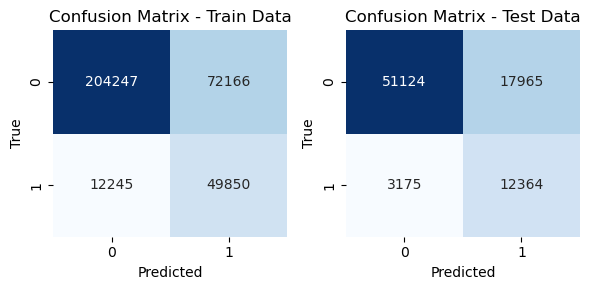

Rapport de classification - Données d'entraînement :
              precision    recall  f1-score   support

         0.0       0.94      0.74      0.83    276413
         1.0       0.41      0.80      0.54     62095

    accuracy                           0.75    338508
   macro avg       0.68      0.77      0.69    338508
weighted avg       0.85      0.75      0.78    338508




Rapport de classification - Données de test :
              precision    recall  f1-score   support

         0.0       0.94      0.74      0.83     69089
         1.0       0.41      0.80      0.54     15539

    accuracy                           0.75     84628
   macro avg       0.67      0.77      0.68     84628
weighted avg       0.84      0.75      0.78     84628



In [98]:
print_rapports(y_train, loaded_predictions_train, y_test, loaded_predictions_test)

### **7. Feature Importance with Random Forests**

In [108]:
features = X_train.columns
importances = mod_RF_simple.feature_importances_
FIM = pd.DataFrame({'Features': features, 'Importance': importances})
FIM = FIM.sort_values(by='Importance', ascending=False)
print("Nb de features total : ",len(FIM))
print("Nb de features avec importance > 0.01 : ",len(FIM[FIM['Importance']>0.01]))
FIM.head(20)


Nb de feature total :  181
Nb de feature avec importance > 0.01 :  22


,Features,Importance
23,col_4.0,0.086302
133,secu1_2.0,0.085436
14,agg_2,0.074484
67,catv_1.0,0.072341
25,catr_3,0.057123
69,catv_3.0,0.051817
0,nb_veh,0.042729
26,catr_4,0.037115
28,circ_2.0,0.035847
32,nbv_2.0,0.034208


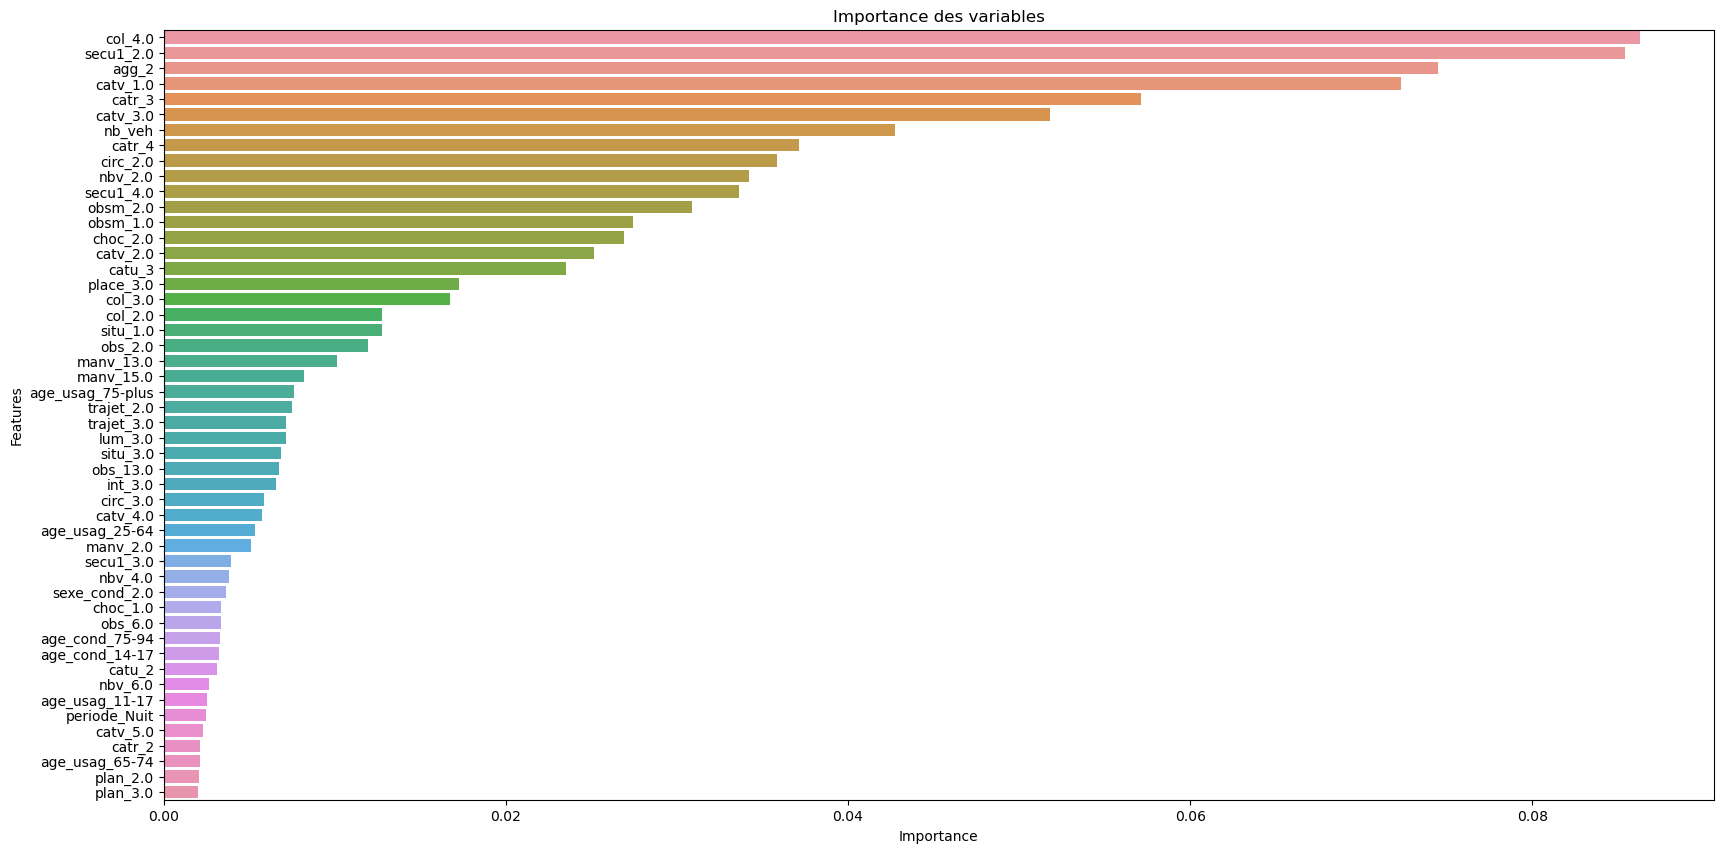

In [115]:
plt.figure(figsize=(20, 10))
plt.title("Importance des variables")
#top_bottom = FIM.head(22).append(FIM.tail(45))
top_bottom = FIM.head(50)
sns.barplot(x="Importance", y="Features", data=top_bottom)
plt.show()

In [ ]:
top_features = FIM['Features'].iloc[:35]

# nouveaux dataset d'entraînement et de test avec features selectionnées
X_train_selected = X_train[top_features]
X_test_selected = X_test[top_features]

In [ ]:
# Choix des hyperparamètres qui maximisent MCC,AUC,F1
param_check = results_df['params'][144]

mod_RF_simple = RF_bin_simple(X_train_selected, X_test_selected, y_train, y_test, param_check)
#mod_RF_simple = RF_bin_simple(X_train, X_test, y_train, y_test, param_check)

# Prédiction sur les données d'entraînement
y_train_pred = mod_RF_simple.predict(X_train_selected)

# Prédiction sur les données de test
y_test_pred = mod_RF_simple.predict(X_test_selected)
print_rapports(y_train, y_train_pred, y_test, y_test_pred)

### **8. Optimisation des resultat de prediction**

#### **8.1 ROC/AUC**



Résultats pour le point le plus proche du coin :
Coordonnées du point le plus proche : (0.24, 0.77)
Seuil de probabilité : 0.5181
Precision: 0.42
Recall: 0.77
F1-Score: 0.55
AUC-ROC : 0.84


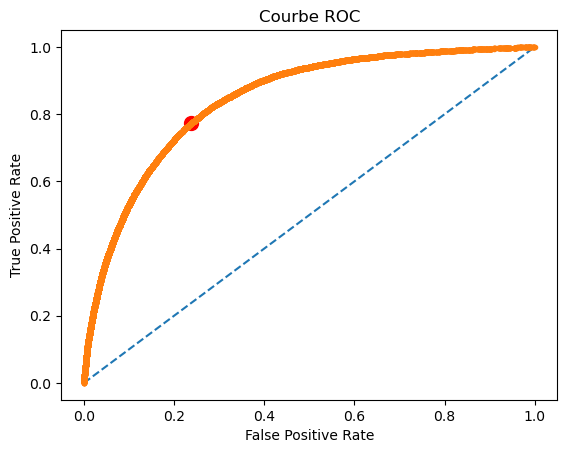

In [145]:
ns_probs = [0 for i in range(len(y_test))]
#y_prob = model.predict_proba(X_test)[:, 1]
y_prob = loaded_modele_RF.predict_proba(X_test)[:, 1]

ns_auc = roc_auc_score(y_test, ns_probs)
RF_roc = roc_auc_score(y_test, y_prob)

#print('No Skill: ROC_AUC=%.3f' % (ns_auc))
#print("RF: ROC_AUC : {:.4f}".format(RF_roc))

# Calcul de la courbe ROC
rf_fpr, rf_tpr, rf_thresholds = roc_curve(y_test, y_prob)
ns_fpr, ns_tpr, ns_thresholds = roc_curve(y_test, ns_probs)

# Affichage de la courbe ROC
plt.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
plt.plot(rf_fpr, rf_tpr, marker='.', label='Random Forest')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Courbe ROC')

# Calculer la courbe ROC
# fpr, tpr, thresholds = roc_curve(y_test, y_prob)
# auc_roc = roc_auc_score(y_test, y_prob)

# le point le plus proche du coin supérieur gauche
closest_idx = np.argmin(np.sqrt((rf_fpr - 0)**2 + (rf_tpr - 1)**2))
closest_point = (rf_fpr[closest_idx], rf_tpr[closest_idx])
closest_threshold = rf_thresholds[closest_idx]

# valeurs de probabilité pour le point le plus proche du coin supérieur gauche
closest_prob = y_prob[np.argmax(np.logical_and(rf_fpr == closest_point[0], rf_tpr == closest_point[1]))]

# Appliquer le seuil de probabilité aux prédictions 
closest_pred = (y_prob >= closest_threshold).astype(int)

# Calculer les métriques de performance pour le point optimal
closest_precision = precision_score(y_test, closest_pred)
closest_recall = recall_score(y_test, closest_pred)
closest_f1 = f1_score(y_test, closest_pred)

# Tracer la courbe ROC 
plt.scatter(closest_point[0], closest_point[1], color='red', label='Point le plus proche',s=100, marker='o')

# Afficher les résultats 
print("Résultats pour le point le plus proche du coin :")
print('Coordonnées du point le plus proche : ({:.2f}, {:.2f})'.format(closest_point[0], closest_point[1]))
print("Seuil de probabilité : {:.4f}".format(closest_threshold))
print("Precision: {:.2f}".format(closest_precision))
print("Recall: {:.2f}".format(closest_recall))
print("F1-Score: {:.2f}".format(closest_f1))
print("AUC-ROC : {:.2f}".format(RF_roc))

plt.show()


Résultats pour le point qui maximise le rappel 
Seuil de probabilité : 0.4040
Precision: 0.3370
Recall: 0.9004
F1-Score: 0.4904
AUC-ROC : 0.84


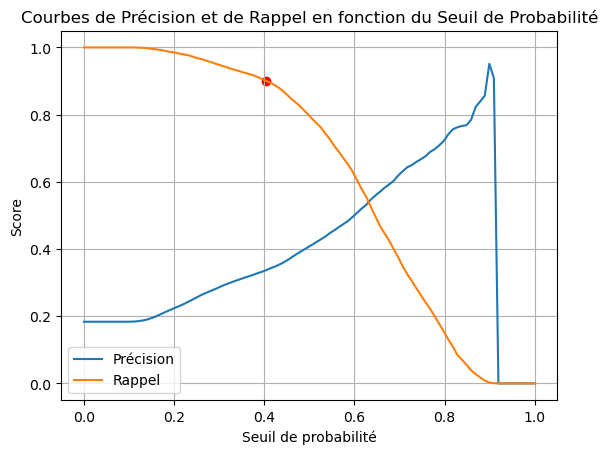

In [148]:

#y_prob = model.predict_proba(X_test)[:, 1]
y_prob = loaded_modele_RF.predict_proba(X_test)[:, 1]

# Calculer la courbe ROC
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
auc_roc = roc_auc_score(y_test, y_prob)

thresholds_dense = np.linspace(0, 1, 100)


recall_threshold = 0.90  # Rappel souhaité
best_threshold = None
best_precision = 0.0
best_recall = 0.0

precision_values = []
recall_values = []

for threshold in thresholds_dense:
    y_pred = (y_prob >= threshold).astype(int)
    precision = precision_score(y_test, y_pred, zero_division=0)
    recall = recall_score(y_test, y_pred, zero_division=0 )
    precision_values.append(precision)
    recall_values.append(recall)
    
    if recall >= recall_threshold:
        if precision > best_precision or (precision == best_precision and recall > best_recall):
            best_threshold = threshold
            best_precision = precision
            best_recall = recall

# le meilleur seuil de probabilité 
y_pred_best = (y_prob >= best_threshold).astype(int)

# Calculer les métriques  avec le meilleur seuil
precision = precision_score(y_test, y_pred_best)
recall = recall_score(y_test, y_pred_best)
f1 = f1_score(y_test, y_pred_best)


# Afficher les résultats 
print("Résultats pour le point qui maximise le rappel ")
print("Seuil de probabilité : {:.4f}".format(best_threshold))
print("Precision: {:.4f}".format(precision))
print("Recall: {:.4f}".format(recall))
print("F1-Score: {:.4f}".format(f1))
print("AUC-ROC : {:.2f}".format(auc_roc))

# Tracer la courbe de précision et de rappel en fonction du seuil de probabilité
plt.figure()
plt.plot(thresholds_dense, precision_values, label='Précision')
plt.plot(thresholds_dense, recall_values, label='Rappel')
plt.xlabel('Seuil de probabilité')
plt.ylabel('Score')
plt.title('Courbes de Précision et de Rappel en fonction du Seuil de Probabilité')
plt.legend()

# Ajouter le point avec le rappel souhaité
plt.scatter(best_threshold, recall_threshold, color='red', marker='o', label='Rappel Souhaité')

plt.grid(True)
plt.show()


#### **8.2 Courbe Fscore**


In [38]:
##### #Entrainer le modele

#results_df['params'] = results_df['params'].apply(ast.literal_eval)

param_check = results_df['params'][144]

#Entrainer le modele avec les hyperparametres qui maximisent MCC,AUC,F1

mod_RF_simple = RF_bin_simple(X_train, X_test, y_train, y_test, param_check)
mod_RF_simple.fit(X_train, y_train)


### Charger le model depuis le fichier pkl

# Charger le dictionnaire depuis le fichier pkl
with open('Save_RandomForest/bin/trainModel_RF_bin_200combin_144.pkl', 'rb') as saved_data_file:
    loaded_data = pickle.load(saved_data_file)

# Accéder aux éléments du dictionnaire
loaded_modele_RF = loaded_data['modele_RF']
loaded_predictions_train = loaded_data['predictions_train']
loaded_predictions_test = loaded_data['predictions_test']

RandomForestClassifier(class_weight='balanced_subsample', max_depth=10,
                       min_samples_leaf=2, n_estimators=300, n_jobs=-1,
                       random_state=42)

##### **8.2.1. Affichage des courbes**

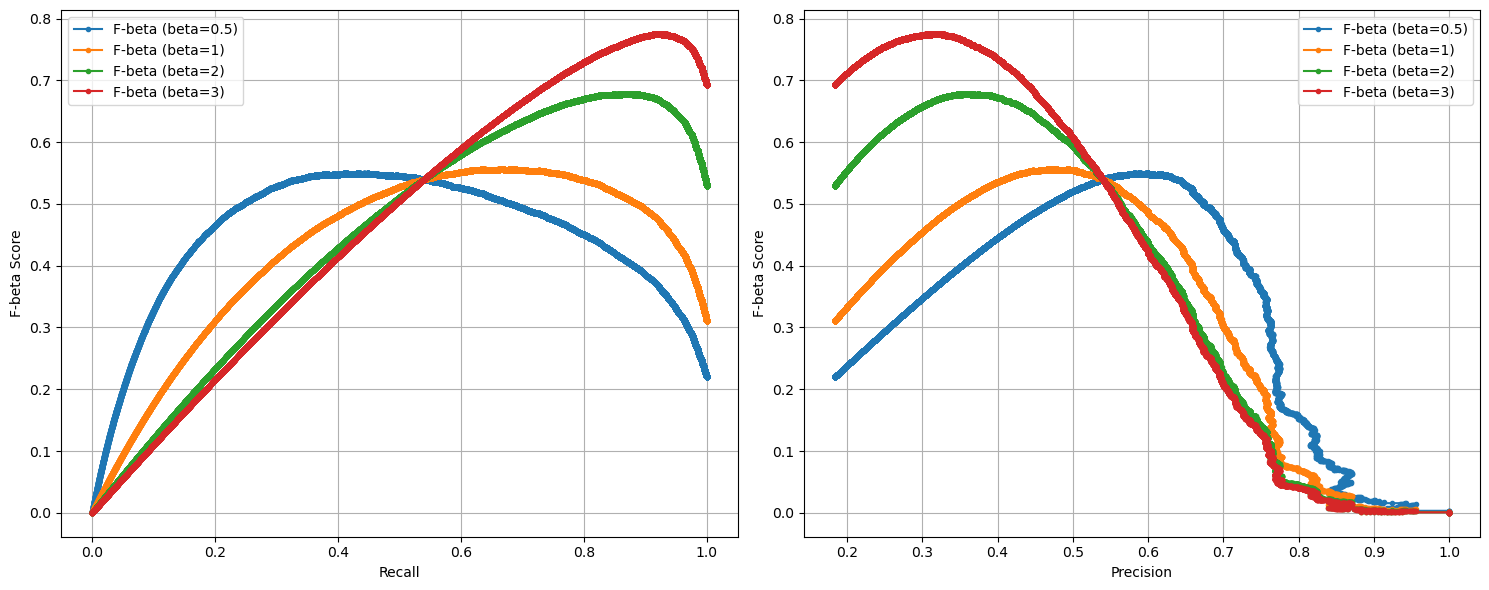

In [118]:

y_probs = loaded_modele_RF.predict_proba(X_test)[:, 1]
#y_probs = mod_RF_simple.predict_proba(X_test)[:, 1]

precision, recall, thresholds = precision_recall_curve(y_test, y_probs)


beta_values = [0.5, 1, 2, 3]


plt.figure(figsize=(15, 6))

# Courbes F-beta en fonction de Recall
plt.subplot(1, 2, 1)
for beta in beta_values:
    f_beta_scores = (1 + beta ** 2) * (precision * recall) / ((beta ** 2 * precision) + recall)
    f_beta_auc = auc(recall, f_beta_scores)
     #plt.plot(recall, f_beta_scores, marker='.', label=f'F-beta (beta={beta}) (AUC = {f_beta_auc:.2f})')
    plt.plot(recall, f_beta_scores, marker='.', label=f'F-beta (beta={beta})')

plt.xlabel('Recall')
plt.ylabel('F-beta Score')
#plt.title('F-beta Score Curves for Different Beta Values (Recall)')
plt.legend()
plt.grid(True)

# Courbes F-beta en fonction de Precision
plt.subplot(1, 2, 2)
for beta in beta_values:
    f_beta_scores = (1 + beta ** 2) * (precision * recall) / ((beta ** 2 * precision) + recall)
    f_beta_auc = auc(recall, f_beta_scores)
    #plt.plot(precision, f_beta_scores, marker='.', label=f'F-beta (beta={beta}) (AUC = {f_beta_auc:.2f})')
    plt.plot(precision, f_beta_scores, marker='.', label=f'F-beta (beta={beta})')

plt.xlabel('Precision')
plt.ylabel('F-beta Score')
#plt.title('F-beta Score Curves for Different Beta Values (Precision)')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()


##### **8.2.2. Optimisation du score**

In [122]:
# Obtenir les probabilités de prédiction pour la classe positive
#y_probs = mod_RF_simple.predict_proba(X_test)[:, 1]
y_probs = loaded_modele_RF.predict_proba(X_test)[:, 1]


precision, recall, thresholds = precision_recall_curve(y_test, y_probs)

# Valeurs de beta
beta_values = [0.5, 1, 2, 3, 4]

desired_recall = 0.99

precision_values = []
f_beta_scores_values = []
recall_values = []
best_thresholds = []

num_thresholds = 100  
thresholds_to_test = np.linspace(0, 1, num_thresholds)

for beta in beta_values:
    f_beta_scores = (1 + beta ** 2) * (precision * recall) / ((beta ** 2 * precision) + recall)
    
    # Trouver  seuil qui maximise le score F-beta 
    best_threshold_index = np.argmax(f_beta_scores)
    best_threshold = thresholds[best_threshold_index]
    
    # Calculer la précision, le F-score et le rappel 
    best_precision = precision[best_threshold_index]
    best_f_beta_score = f_beta_scores[best_threshold_index]
    best_recall = recall[best_threshold_index]
    
    # Stocker les résultats
    precision_values.append(best_precision)
    f_beta_scores_values.append(best_f_beta_score)
    recall_values.append(best_recall)
    best_thresholds.append(best_threshold)

# Afficher les résultats
for beta, precision_value, f_beta_score_value, recall_value, threshold_value in zip(
    beta_values, precision_values, f_beta_scores_values, recall_values, best_thresholds
):
    print(f"Beta = {beta}, Précision = {precision_value:.4f}, F{beta}-score = {f_beta_score_value:.4f}, Rappel = {recall_value:.4f}")
    print(f"Seuil de probabilité optimal : {threshold_value:.4f}")
    print()

# Choisir la meilleure valeur de beta en fonction du F-score
best_beta_index = np.argmax(f_beta_scores_values)
best_beta = beta_values[best_beta_index]
best_precision = precision_values[best_beta_index]
best_recall = recall_values[best_beta_index]
best_threshold = best_thresholds[best_beta_index]

# Afficher les résultats pour la meilleure valeur de beta
print(f"Meilleure valeur de beta : {best_beta}")
print(f"Précision : {best_precision:.4f}")
print(f"F-score : {f_beta_scores_values[best_beta_index]:.4f}")
print(f"Rappel : {best_recall:.4f}")
print(f"Seuil de probabilité optimal : {best_threshold:.4f}")


# Tester manuellement le seuil optimal
#best_threshold = 0.6830

# Utiliser le seuil optimal pour prédictions sur test
y_pred = (y_probs >= best_threshold).astype(int)

#  matrice de confusion et le rapport de classification
confusion = confusion_matrix(y_test, y_pred)
print("Matrice de confusion:")
print(confusion)

report = classification_report(y_test, y_pred)
print("Rapport de classification:")
print(report)


Beta = 0.5, Précision = 0.6000, F0.5-score = 0.5495, Rappel = 0.4111
Seuil de probabilité optimal : 0.6830

Beta = 1, Précision = 0.4781, F1-score = 0.5562, Rappel = 0.6648
Seuil de probabilité optimal : 0.5789

Beta = 2, Précision = 0.3552, F2-score = 0.6778, Rappel = 0.8770
Seuil de probabilité optimal : 0.4355

Beta = 3, Précision = 0.3200, F3-score = 0.7751, Rappel = 0.9205
Seuil de probabilité optimal : 0.3680

Beta = 4, Précision = 0.2721, F4-score = 0.8353, Rappel = 0.9595
Seuil de probabilité optimal : 0.2752

Meilleure valeur de beta : 4
Précision : 0.2721
F-score : 0.8353
Rappel : 0.9595
Seuil de probabilité optimal : 0.2752
Matrice de confusion:
[[29205 39884]
 [  630 14909]]
Rapport de classification:
              precision    recall  f1-score   support

         0.0       0.98      0.42      0.59     69089
         1.0       0.27      0.96      0.42     15539

    accuracy                           0.52     84628
   macro avg       0.63      0.69      0.51     84628
weigh